In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
movies=pd.read_csv("archive/movies.dat",sep="::",engine="python",encoding="latin1")

In [11]:
movies.columns=["MovieId","Title","Category"]
movies.head()

,MovieId,Title,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [12]:
ratings= pd.read_csv("archive/ratings.dat",sep="::",engine="python",encoding="latin1")
ratings.columns=["UserId","MovieId","Rating","Timestamp"]
ratings

,UserId,MovieId,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
...,...,...,...,...
1000203,6040,1091,1,956716541
1000204,6040,1094,5,956704887
1000205,6040,562,5,956704746
1000206,6040,1096,4,956715648


In [13]:
users=pd.read_csv("archive/users.dat",sep="::",engine="python",encoding="latin1")
users.columns=["UserId","Gender","Age","Occupation","Zip-Code"]
users

,UserId,Gender,Age,Occupation,Zip-Code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
...,...,...,...,...,...
6034,6036,F,25,15,32603
6035,6037,F,45,1,76006
6036,6038,F,56,1,14706
6037,6039,F,45,0,01060


In [14]:
movies

,MovieId,Title,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


In [15]:
user_ratings=pd.merge(users,ratings,on=['UserId'])
movie_ratings=pd.merge(movies,ratings,on=['MovieId'])

In [16]:
final_data=pd.merge(user_ratings,movie_ratings,on=['UserId','MovieId','Rating',])[['MovieId','Title','UserId','Age','Gender',
                                                                                   'Occupation','Rating']]
final_data.head(10)

,MovieId,Title,UserId,Age,Gender,Occupation,Rating
0,1357,Shine (1996),2,56,M,16,5
1,3068,"Verdict, The (1982)",2,56,M,16,4
2,1537,Shall We Dance? (Shall We Dansu?) (1996),2,56,M,16,4
3,647,Courage Under Fire (1996),2,56,M,16,3
4,2194,"Untouchables, The (1987)",2,56,M,16,4
5,648,Mission: Impossible (1996),2,56,M,16,4
6,2268,"Few Good Men, A (1992)",2,56,M,16,5
7,2628,Star Wars: Episode I - The Phantom Menace (1999),2,56,M,16,3
8,1103,Rebel Without a Cause (1955),2,56,M,16,3
9,2916,Total Recall (1990),2,56,M,16,3


<AxesSubplot: xlabel='Rating', ylabel='count'>

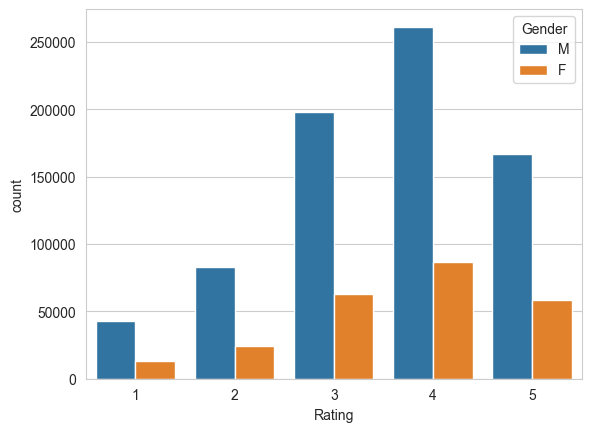

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Rating',hue='Gender',data=final_data)

<AxesSubplot: xlabel='Rating', ylabel='count'>

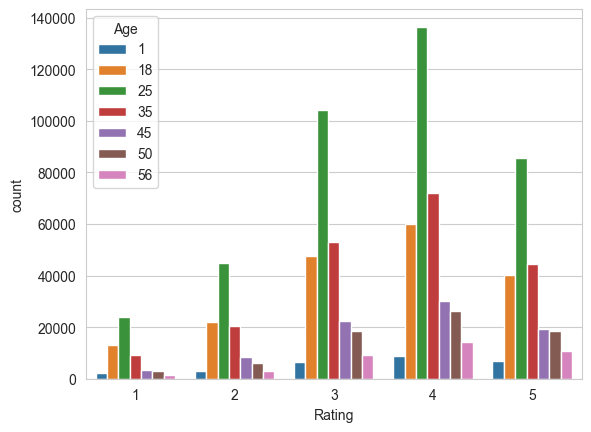

In [23]:
sns.set_style('whitegrid')
sns.countplot(x="Rating",hue="Age",data=final_data,)

In [24]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998080 entries, 0 to 998079
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   MovieId     998080 non-null  int64 
 1   Title       998080 non-null  object
 2   UserId      998080 non-null  int64 
 3   Age         998080 non-null  int64 
 4   Gender      998080 non-null  object
 5   Occupation  998080 non-null  int64 
 6   Rating      998080 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 53.3+ MB
